# Работа с базами данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Работа с базами данных"
* https://sqliteonline.com/
* https://docs.python.org/3/library/sqlite3.html
* https://www.sqlitetutorial.net/sqlite-create-table/
* https://docs.python.org/3/library/pickle.html
* https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
* https://www.datacamp.com/community/tutorials/group-by-having-clause-sql

## Задачи для совместного разбора

In [1]:
import pandas as pd
import sqlite3

In [6]:
students = pd.DataFrame(
    [
        ("Сотников Евгений Янович", 1),
        ("Степанова Виктория Константиновна", 1),
        ("Горелова Вероника Яновна", 2),
        ("Гришин Иван Романович", 3),
    ],
    columns=["name", "group_id"],
)


groups = list(zip([1, 2, 3], ["ПМ20-1", "ПМ20-2", "ПМ20-3"]))
groups

[(1, 'ПМ20-1'), (2, 'ПМ20-2'), (3, 'ПМ20-3')]

1. Создайте БД sqlite3 и таблицы Student и StudentGroup в ней.

In [3]:
con = sqlite3.connect("demo.db")

cur = con.cursor()

sql = """
CREATE TABLE StudentGroup(
    group_id INT PRIMARY KEY,
    group_name VARCHAR NOT NULL
);

CREATE TABLE Student(
    student_name VARCHAR PRIMARY KEY,
    group_id INT,
    FOREIGN KEY (group_id) REFERENCES StudentGroup(group_id)
);
"""
cur.executescript(sql)
con.commit()

2. Заполните созданные таблицы данными

In [4]:
# sql = '''
# INSERT INTO StudentGroup(group_id, group_name)
#     VALUES (1, "ПМ20-1"), (2, "ПМ20-2"), (3, "ПМ20-3")
# '''

sql = '''
INSERT INTO StudentGroup(group_id, group_name)
     VALUES (?, ?)
'''
# cur.execute(sql, (1, "ПМ20-1"))
# cur.execute(sql, (2, "ПМ20-2"))
# cur.execute(sql, (3, "ПМ20-3"))
# for group in groups:
#     cur.execute(sql, group)
cur.executemany(sql, groups)
con.commit()

students

,name,group_id
0,Сотников Евгений Янович,1
1,Степанова Виктория Константиновна,1
2,Горелова Вероника Яновна,2
3,Гришин Иван Романович,3


In [5]:
students.rename(
    columns={"name": "student_name"}
).to_sql("Student", con, if_exists="append", index=False)

4

3. Выведите на экран фамилии студентов и номера их групп.

In [6]:
res = cur.execute("SELECT * FROM StudentGroup;")
# res.fetchone()
# res.fetchmany(2)
# res.fetchall()
# print(res.fetchone())
# print(res.fetchone())
# print(res.fetchone())
# print(res.fetchone())

pd.read_sql_query("SELECT * FROM Student;", con)

cur.close()
con.close()

(1, 'ПМ20-1')


## Лабораторная работа 3

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy` и `pandas`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy` или структур `pandas` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

In [1]:
import pandas as pd
import sqlite3
import pickle as pl

### Создание и заполнение базы данных

<p class="task" id="1"></p>

1\. Создайте файл БД sqlite3 согласно рисунку ниже, на котором определен набор таблиц и связей между ними. Обратите внимание, что поля, выделенные полужирным шрифтом, обозначают первичный ключ таблицы.

Для решения задания напишите скрипт на языке SQL и исполните его при помощи метода `executescript` объекта-курсора.

In [2]:
con = sqlite3.connect("demo1.db")
cur = con.cursor()

In [3]:
sql = """
CREATE TABLE Tag(
    tag VARCHAR,
    recipe_id INT PRIMARY KEY
);

CREATE TABLE Recipe(
    id INT PRIMARY KEY,
    name VARCHAR,
    minutes INT,
    submitted VARCHAR,
    description TEXT,
    n_ingredients INT
);

CREATE TABLE Review(
    id INT PRIMARY KEY,
    user_id INT,
    recipe_id INT,
    date VARCHAR NOT NULL,
    rating INT,
    review TEXT,
    FOREIGN KEY (recipe_id) REFERENCES Recipe (id)
);
"""
cur.executescript(sql)
con.commit()

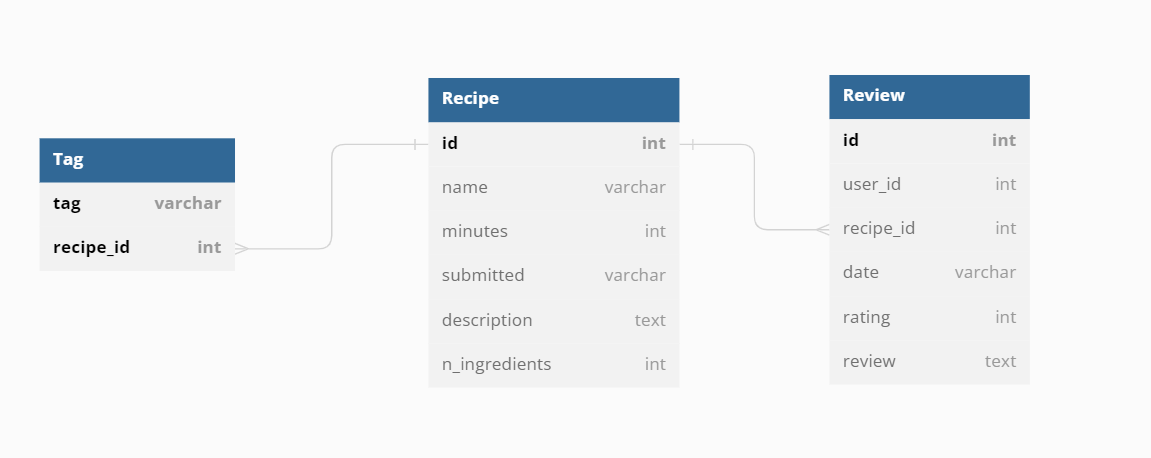

<p class="task" id="2"></p>

2\. Загрузите данные из файла `recipes_sample.csv` в таблицу `Recipe`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора.

In [4]:
df = pd.read_csv('recipes_sample.csv')

In [5]:
df.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [6]:
buf = list(zip(df['id'], df['name'], df['minutes'], df['submitted'], df['description'], df['n_ingredients']))

In [7]:
sql = """INSERT INTO Recipe(id, name, minutes, submitted, description, n_ingredients)
    VALUES (?, ?, ?, ?, ?, ?)
"""

cur.executemany(sql, buf)
con.commit()

In [8]:
res = cur.execute("SELECT * FROM Recipe;")
res.fetchall()

[(44123,
  'george s at the cove  black bean soup',
  90,
  '2002-10-25',
  "an original recipe created by chef scott meskan, george's at the cove. we enjoyed this when we visited this restaurant in la jolla, california. this recipe is requested so often, they have it printed and ready at the hostess stand. it's unbeatable at the restaurant, but i do a pretty good job at home, too, if i do say so myself!",
  18),
 (67664,
  'healthy for them  yogurt popsicles',
  10,
  '2003-07-26',
  'my children and their friends ask for my homemade popsicles morning, noon and night. i never turn them down; who am i to tell them that they are good for them! for variety i substitute different flavours of frozen juice - grape, fruit punch, tropical etc.',
  None),
 (38798,
  'i can t believe it s spinach',
  30,
  '2002-08-29',
  'these were so go, it surprised even me.',
  8),
 (35173,
  'italian  gut busters',
  45,
  '2002-07-27',
  'my sister-in-law made these for us at a family get together. they 

<p class="task" id="3"></p>

3\. Загрузите данные из файла `reviews_sample.csv` в таблицу `Review`. При выполнении задания воспользуйтесь методом `pd.DataFrame.to_sql`.

In [9]:
df1 = pd.read_csv('reviews_sample.csv')

In [10]:
df1.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [11]:
df1.to_sql('Review', con, if_exists='replace', index=False)

126696

In [12]:
res = cur.execute("SELECT * FROM Review;")
res.fetchall()

[(370476,
  21752,
  57993,
  '2003-05-01',
  5,
  "Last week whole sides of frozen salmon fillet was on sale in my local supermarket, so I bought tons (okay, only 3, but total weight was over 10 pounds).  This recipe is perfect for salmon fillet, even though it calls for salmon steaks.  I cut up the salmon into individual portions and followed the instructions exactly.  I'm on one of those food combining diets, so I left out the white wine but added just a dash of white wine vinegar instead (just a little bit, not enough to change the taste of the dish).  Super yummy, and leftovers for lunch today (lucky me)!"),
 (624300,
  431813,
  142201,
  '2007-09-16',
  5,
  "So simple and so tasty!  I used a yellow capsicum in place of the green because that's what I had on hand.  This came together so fast.  Perfect meal if you don't have a lot of time.  Easy, healthy and tasty.  Thanks Stardustannie!  Made for PAC Fall 2007."),
 (187037,
  400708,
  252013,
  '2008-01-10',
  4,
  'Very nice b

<p class="task" id="4"></p>

4\. Загрузите данные из файла `tags_sample.pickle` в таблицу `Tag`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора или методом `pd.DataFrame.to_sql`. 

Для считывания файла с данными воспользуйтесь пакетом `pickle`. Обратите внимание, что перед добавлением записей в базу данные нужно привести к соответствующему таблице в БД виду (в каждой строчке столбца tag должен находиться один тэг).

In [13]:
with open('tags_sample.pickle', 'rb') as f:
    tag = pl.load(f)
tag = pd.DataFrame(tag)
tag = tag.explode('tag')
tag

,id,tag
0,48,equipment
0,48,pies
0,48,pies-and-tarts
0,48,course
0,48,north-american
...,...,...
29983,536747,desserts
29983,536747,number-of-servings
29983,536747,course
29983,536747,preparation


In [14]:
tag.to_sql('Tag', con, if_exists='replace', index=False)

533474

In [15]:
res = cur.execute("SELECT * FROM Tag;")
res.fetchall()

[(48, 'equipment'),
 (48, 'pies'),
 (48, 'pies-and-tarts'),
 (48, 'course'),
 (48, 'north-american'),
 (48, 'time-to-make'),
 (48, 'cuisine'),
 (48, 'desserts'),
 (48, 'american'),
 (48, 'oven'),
 (48, 'eggs-dairy'),
 (48, 'main-ingredient'),
 (48, 'preparation'),
 (48, 'weeknight'),
 (48, 'dietary'),
 (48, '4-hours-or-less'),
 (55, 'appetizers'),
 (55, 'low-cholesterol'),
 (55, 'low-sodium'),
 (55, 'low-protein'),
 (55, 'dietary'),
 (55, 'healthy'),
 (55, 'southwestern-united-states'),
 (55, 'cuisine'),
 (55, 'time-to-make'),
 (55, 'low-carb'),
 (55, '4-hours-or-less'),
 (55, 'healthy-2'),
 (55, 'north-american'),
 (55, 'american'),
 (55, '3-steps-or-less'),
 (55, 'occasion'),
 (55, 'no-cook'),
 (55, 'course'),
 (55, 'weeknight'),
 (55, '5-ingredients-or-less'),
 (55, 'easy'),
 (55, 'mexican'),
 (55, 'technique'),
 (55, 'low-in-something'),
 (55, 'dips'),
 (55, 'preparation'),
 (66, 'equipment'),
 (66, 'low-cholesterol'),
 (66, 'low-protein'),
 (66, 'dietary'),
 (66, 'low-fat'),
 (66,

---
### Получение данных из базы

<p class="task" id="5"></p>

5\. Напишите и выполните запрос на языке SQL, который считает кол-во рецептов, опубликованных в 2010 году и имеющих длину не менее 15 минут. Для выполнения запроса используйте метод `execute` объекта-курсора. Выведите искомое количество на экран.

In [16]:
sql = """SELECT COUNT(*) FROM Recipe WHERE submitted LIKE '2010%' and minutes >= 15;"""
res = cur.execute(sql)
res.fetchall()

[(1319,)]

<p class="task" id="6"></p>

6\. Напишите и выполните запрос на языке SQL, который возращает id рецептов, не имеющих ни одного отзыва отзывов с рейтингом, меньше 4. Для выполнения запроса используйте функцию `pd.read_sql_query`. Выведите полученный результат на экран.

In [17]:
sql = """SELECT id FROM Recipe
    WHERE id NOT IN (
    SELECT recipe_id FROM Review
    WHERE rating < 4)
"""
res = pd.read_sql_query(sql, con)
res

,id
0,55
1,66
2,91
3,94
4,128
...,...
22361,536360
22362,536473
22363,536547
22364,536728


<p class="task" id="7"></p>

7\. Используя механизмы группировки и объединения, которые предоставляет SQL, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. При выполнении задания воспользуйтесь методом `execute` объекта-курсора. Измерьте время выполнения работы вашего кода.

Вся необходимая логика (группировки, объединения, выбор топ-5 строк) должна быть реализована на SQL, а не в виде кода на Python.

<p class="task" id="8"></p>

8\. Запросите у пользователя id рецепта и верните информацию об этом рецепте. Если рецепт отсутствует, выведите соответствующее сообщение. Для подстановки значения id необходимо воспользоваться специальным синтаксисом, которые предоставляет `sqlite` для этих целей. Продемонстрируйте работоспособность вашего решения.

In [18]:
s = input('Введите ID рецепта ')
sql = f"""
SELECT * FROM Recipe WHERE id={s}
"""

res = cur.execute(sql)
a = res.fetchall()
if len(a) == 0:
    print('Такого рецепта не сущетсвует')
else:
    print(a)

Введите ID рецепта 55
[(55, 'betty crocker s southwestern guacamole dip', 125, '1999-09-15', None, 5)]
